<a href="https://colab.research.google.com/github/singhsneha99/BDS_Predictive/blob/main/Complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sys,os
# Block which runs on both Google Colab and Local PC without any modification
if 'google.colab' in sys.modules:    
    project_path = "/content/drive/My Drive/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

# Let's look at the sys path
print('Current working directory', os.getcwd())

Mounted at /content/drive/
/content/drive/My Drive
Current working directory /content/drive/My Drive


LINEAR REGRESSION:

<ipython-input-4-ed4f6600af51>:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['sale_price_pct_change'] = df.groupby('tract_1000_grp')['SALE_PRICE'].apply(lambda x: x.pct_change())


MAE by group:
group
1.0    0.076853
2.0    0.039967
3.0    0.101578
4.0    0.118439
5.0    0.064634
6.0    0.082283
7.0    0.046138
8.0    0.114798
dtype: float64
Overall MAE: 0.07821858021359746


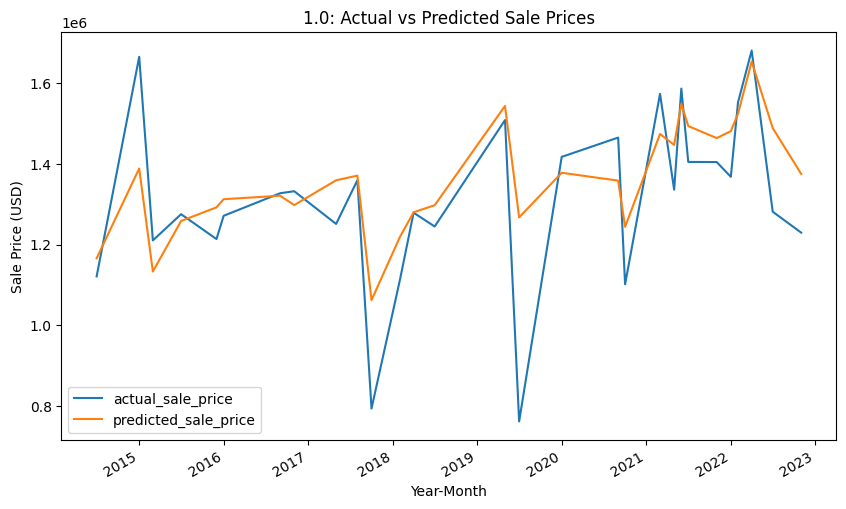

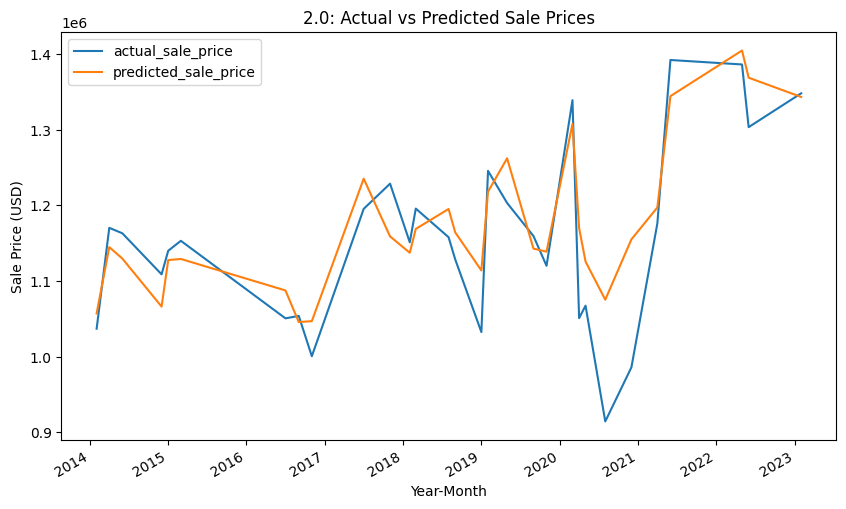

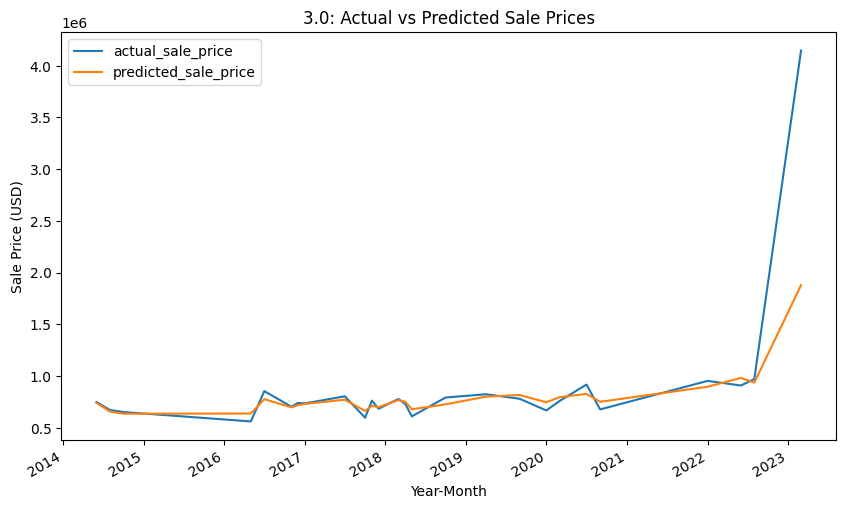

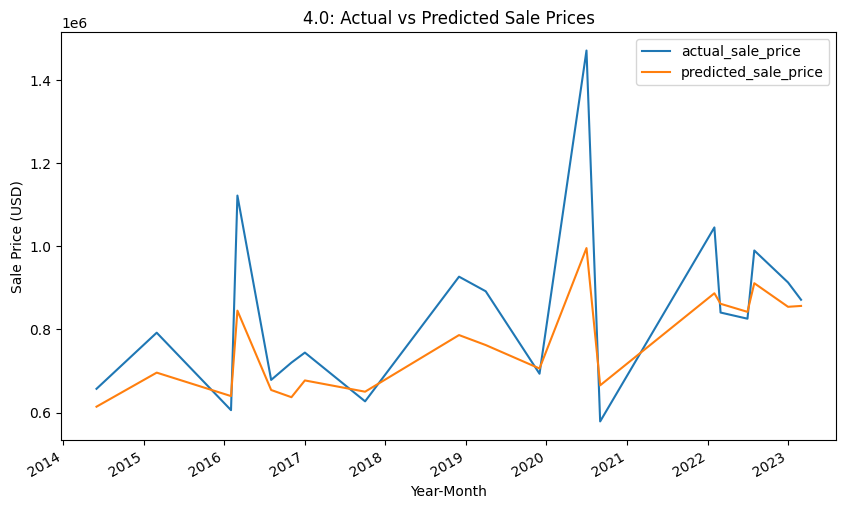

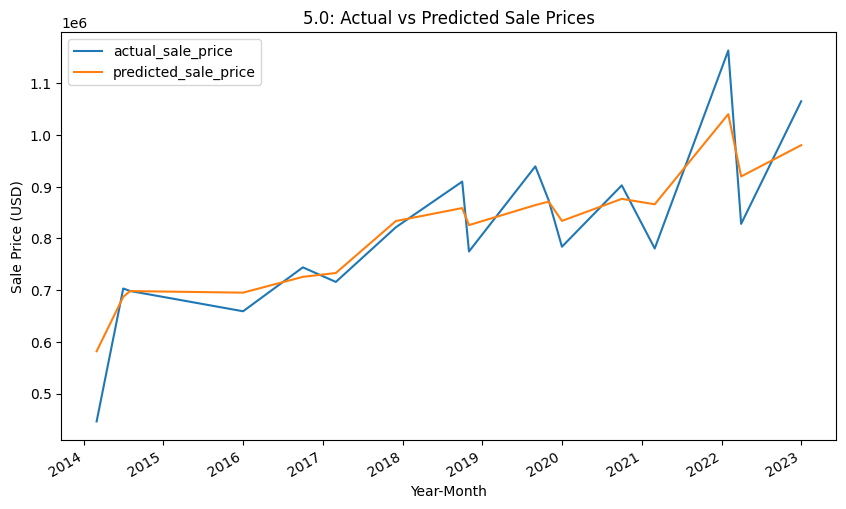

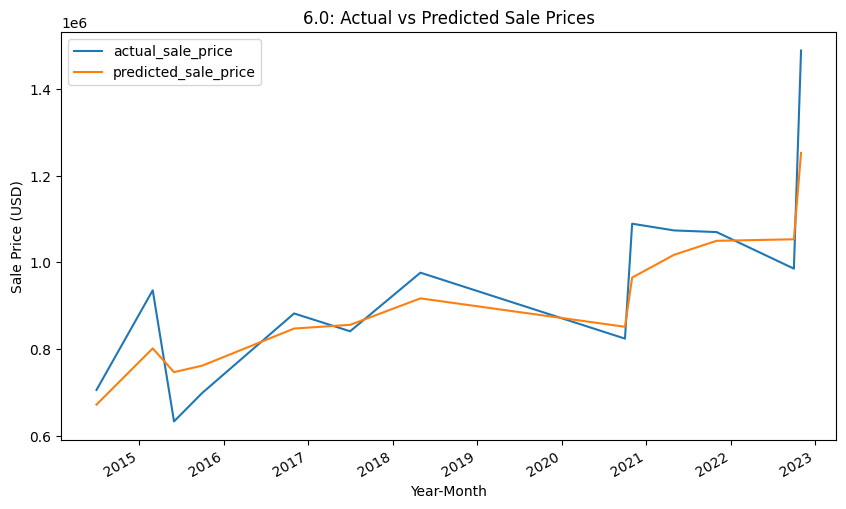

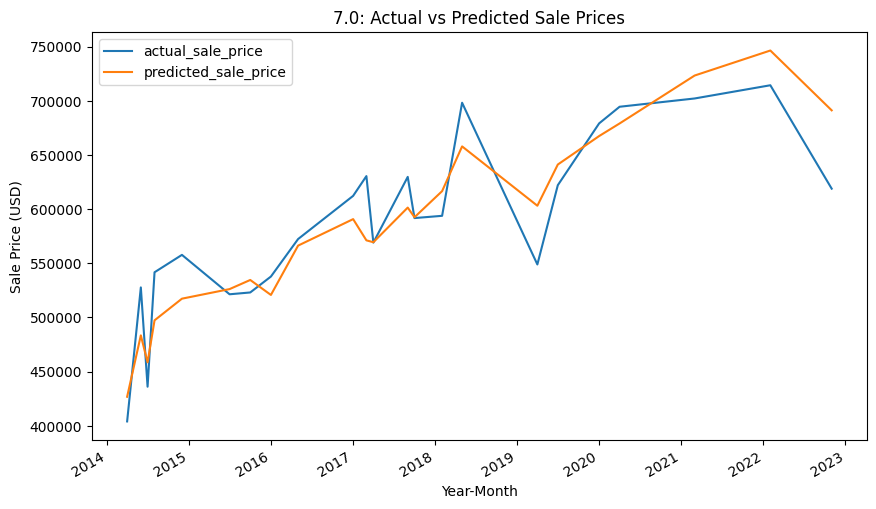

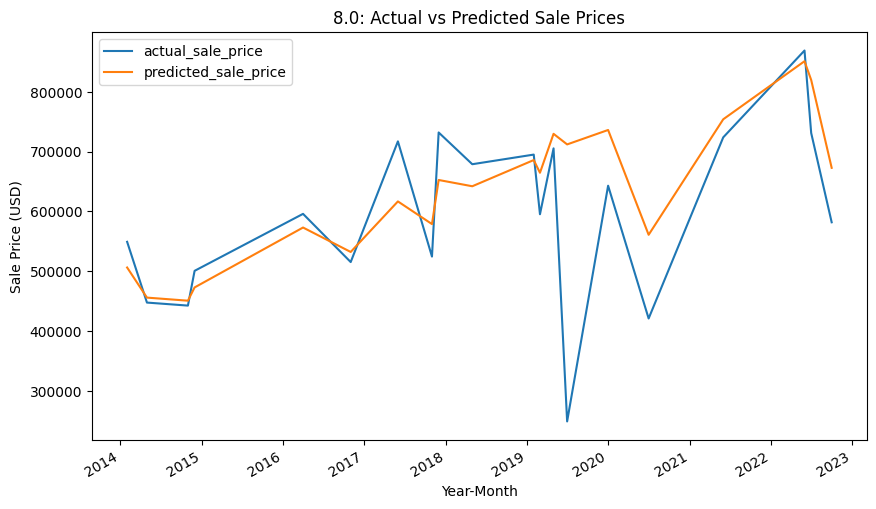

In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Read the data
df = pd.read_csv('/content/drive/My Drive/TimeSeries_Data/Complaints_time_series.csv')

# Convert yr-month to a datetime object
df['yr-month'] = pd.to_datetime(df['yr-month'], format='%Y-%m')

# Calculate the percentage change in SALE_PRICE from the previous month
df['sale_price_pct_change'] = df.groupby('tract_1000_grp')['SALE_PRICE'].apply(lambda x: x.pct_change())

# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Drop any rows with missing values
train = train.dropna()
test = test.dropna()

# Fit linear regression model on the train set for each group
models = {}
for group, data in train.groupby('tract_1000_grp'):
    model = LinearRegression()
    X_train = data.drop(['tract_1000_grp', 'yr-month', 'SALE_PRICE', 'sale_price_pct_change'], axis=1)
    y_train = data['sale_price_pct_change']
    model.fit(X_train, y_train)
    models[group] = model

# Make predictions on the test set for each group
predictions = pd.DataFrame(columns=['group', 'yr-month', 'predicted_sale_price_pct_change', 'actual_sale_price_pct_change'])
for group, data in test.groupby('tract_1000_grp'):
    model = models[group]
    X_test = data.drop(['tract_1000_grp', 'yr-month', 'SALE_PRICE', 'sale_price_pct_change'], axis=1)
    y_test_pred = model.predict(X_test)
    data['predicted_sale_price_pct_change'] = y_test_pred
    data['actual_sale_price_pct_change'] = data['sale_price_pct_change']
    data['group'] = group
    predictions = pd.concat([predictions, data[['group', 'yr-month','SALE_PRICE', 'predicted_sale_price_pct_change', 'actual_sale_price_pct_change']]])
    
# Calculate the mean absolute error (MAE) of the predictions for each group
mae_by_group = predictions.groupby('group').apply(lambda x: abs(x['predicted_sale_price_pct_change'] - x['actual_sale_price_pct_change']).mean())

# Calculate the overall mean absolute error (MAE)
overall_mae = abs(predictions['predicted_sale_price_pct_change'] - predictions['actual_sale_price_pct_change']).mean()

# Print the performance metrics for each group and the overall MAE
print("MAE by group:")
print(mae_by_group)
print("Overall MAE:", overall_mae)

#print(predictions.head())
# Plot the predicted and actual sale prices for each group
for group, predictions in predictions.groupby('group', group_keys=False):
    predictions = predictions.set_index('yr-month')
    predictions['predicted_sale_price'] = predictions['SALE_PRICE'] * (1 + predictions['predicted_sale_price_pct_change'])
    predictions['actual_sale_price'] = predictions['SALE_PRICE'] * (1 + predictions['actual_sale_price_pct_change'])
    predictions[['actual_sale_price', 'predicted_sale_price']].plot(figsize=(10, 6))
    plt.title(f'{group}: Actual vs Predicted Sale Prices')
    plt.xlabel('Year-Month')
    plt.ylabel('Sale Price (USD)')
    plt.show()



LSTM:

ARIMA:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Read the data
df = pd.read_csv('/content/drive/My Drive/TimeSeries_Data/Complaints_time_series.csv')

# Convert yr-month to a datetime object
df['yr-month'] = pd.to_datetime(df['yr-month'], format='%Y-%m')

# Calculate the percentage change in SALE_PRICE from the previous month
df['sale_price_pct_change'] = df.groupby('tract_1000_grp')['SALE_PRICE'].apply(lambda x: x.pct_change())

# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Drop any rows with missing values
train = train.dropna()
test = test.dropna()


train.head()


<ipython-input-6-ccf65a551a63>:15: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['sale_price_pct_change'] = df.groupby('tract_1000_grp')['SALE_PRICE'].apply(lambda x: x.pct_change())


,yr-month,tract_1000_grp,SALE_PRICE,tract,counts_per_block,sale_price_pct_change
707,2021-02-01,4.0,7.077806e+05,1719.0,1719.0,-0.268986
239,2016-03-01,8.0,5.633206e+05,253.0,253.0,0.022028
381,2017-09-01,6.0,8.300420e+05,683.0,683.0,0.017625
791,2022-11-01,8.0,5.747955e+05,651.0,651.0,-0.103620
682,2021-10-01,3.0,1.119554e+06,3545.0,3545.0,0.457179


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE by group:
group
1.0    0.077359
2.0    0.039591
3.0    0.111073
4.0    0.112962
5.0    0.087420
6.0    0.085101
7.0    0.045553
8.0    0.150358
dtype: float64
Overall MAE: 0.08538218353505739


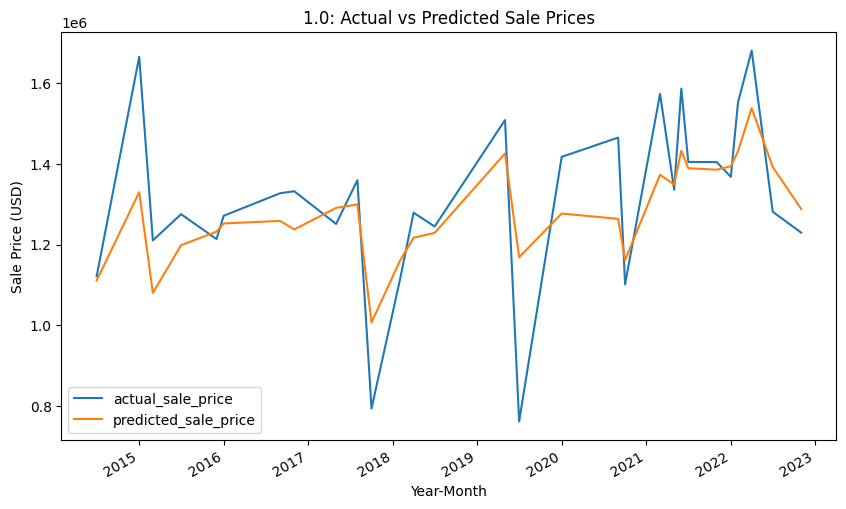

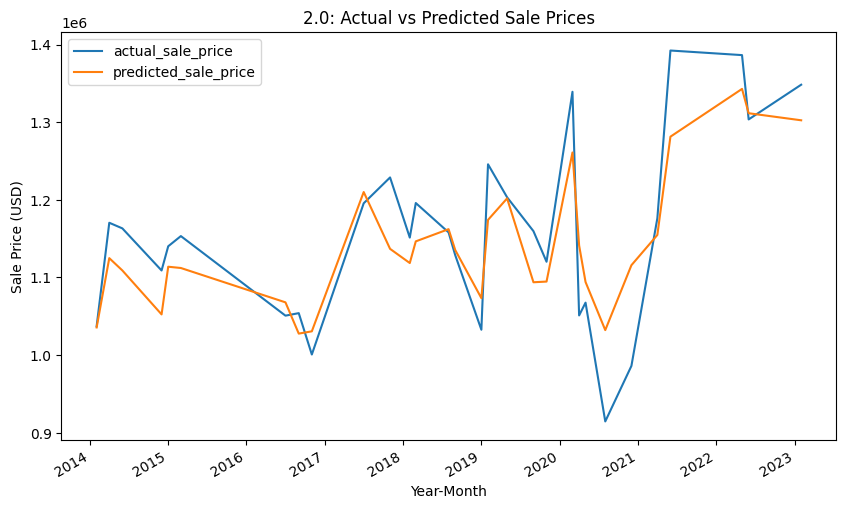

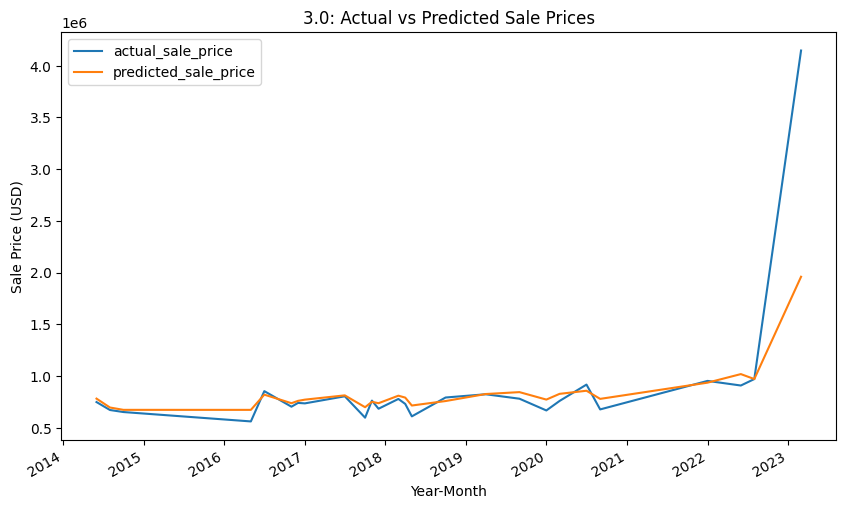

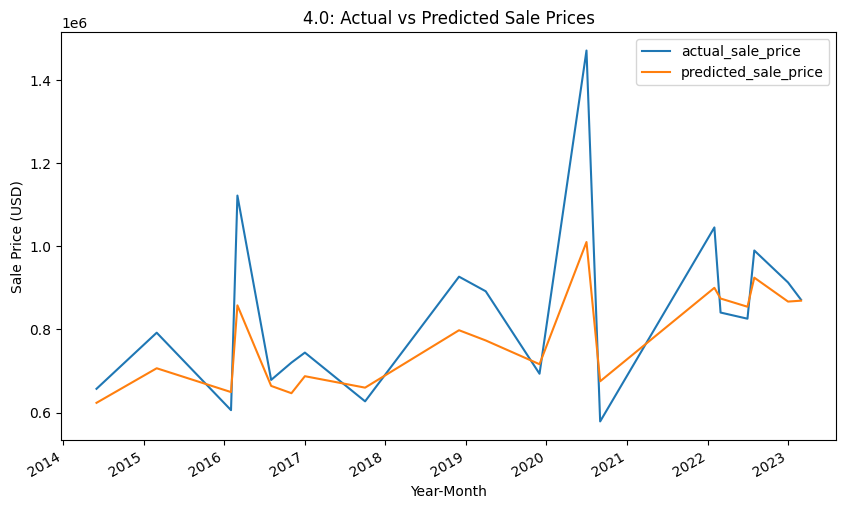

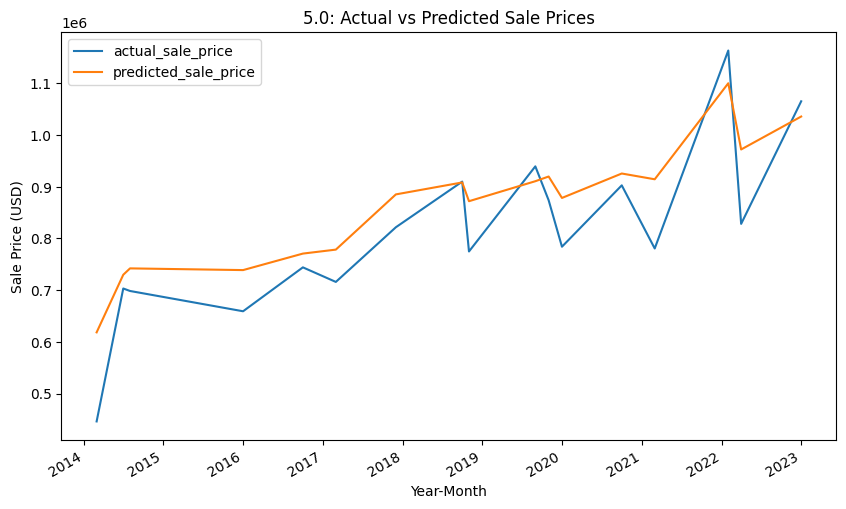

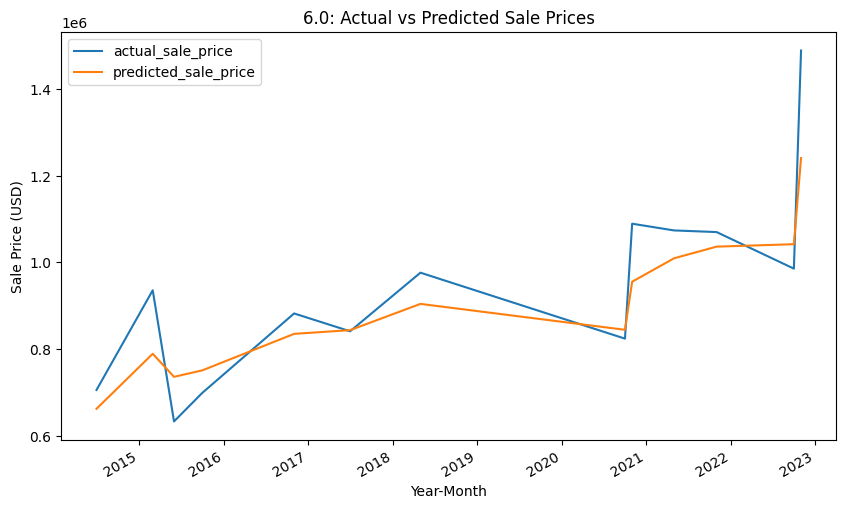

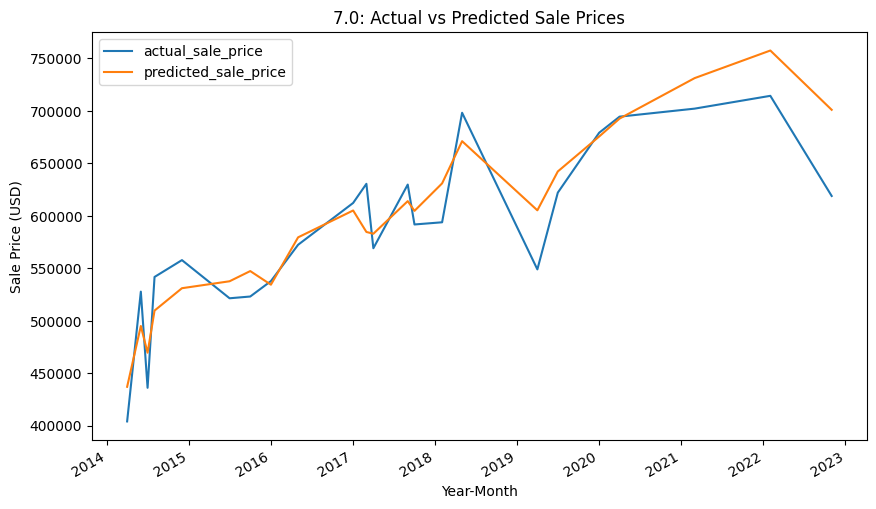

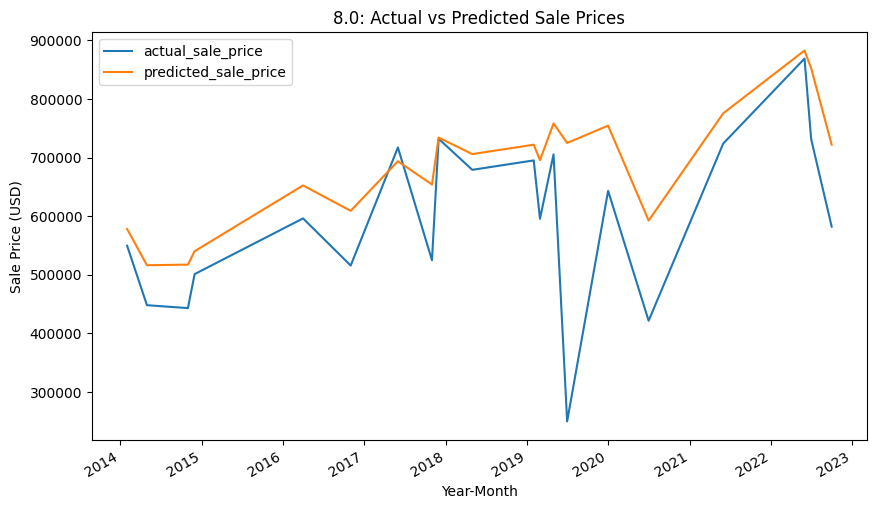

In [7]:
# Fit ARIMA model on the train set for each group
models = {}
for group, df in train.groupby('tract_1000_grp'):
    df = df.set_index('yr-month')
    # set frequency to Month Start (MS)
    df = df.asfreq('MS')
    model = ARIMA(df['sale_price_pct_change'], order=(1, 0, 0), freq=df.index.freq)  # pass frequency to ARIMA model
    model_fit = model.fit()
    models[group] = model_fit

# Make predictions on the test set for each group
predictions = pd.DataFrame(columns=['group', 'yr-month', 'predicted_sale_price_pct_change', 'actual_sale_price_pct_change'])
for group, data in test.groupby('tract_1000_grp'):
    model_fit = models[group]
    start_index = len(data)  # set the start index to the end of the training data
    end_index = start_index + len(data) - 1  # set the end index to the end of the test data
    y_test_pred, *_ = model_fit.forecast(steps=len(data)) # forecast future values
    data['predicted_sale_price_pct_change'] = y_test_pred
    data['actual_sale_price_pct_change'] = data['sale_price_pct_change']
    data['group'] = group
    predictions = pd.concat([predictions, data[['group', 'yr-month','SALE_PRICE', 'predicted_sale_price_pct_change', 'actual_sale_price_pct_change']]])

# Calculate the mean absolute error (MAE) of the predictions for each group
mae_by_group = predictions.groupby('group').apply(lambda x: abs(x['predicted_sale_price_pct_change'] - x['actual_sale_price_pct_change']).mean())

# Calculate the overall mean absolute error (MAE)
overall_mae = abs(predictions['predicted_sale_price_pct_change'] - predictions['actual_sale_price_pct_change']).mean()

# Print the performance metrics for each group and the overall MAE
print("MAE by group:")
print(mae_by_group)
print("Overall MAE:", overall_mae)

# Plot the predicted and actual sale prices for each group
for group, predictions in predictions.groupby('group', group_keys=False):
    predictions = predictions.set_index('yr-month')
    predictions['predicted_sale_price'] = predictions['SALE_PRICE'] * (1 + predictions['predicted_sale_price_pct_change'])
    predictions['actual_sale_price'] = predictions['SALE_PRICE'] * (1 + predictions['actual_sale_price_pct_change'])
    predictions[['actual_sale_price', 'predicted_sale_price']].plot(figsize=(10, 6))
    plt.title(f'{group}: Actual vs Predicted Sale Prices')
    plt.xlabel('Year-Month')
    plt.ylabel('Sale Price (USD)')
    plt.show()